In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df=pd.read_csv("Expanded_data_with_more_features.csv")

In [57]:
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

In [58]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [60]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

##### drop unnamed column

In [61]:
df=df.drop("Unnamed: 0",axis=1)

In [62]:
print(df.head())

   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


##### change weekly study hours column

In [63]:
df["WklyStudyHours"]=df["WklyStudyHours"].str.replace("05-Oct","05-10")

In [64]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


#### gender distribution

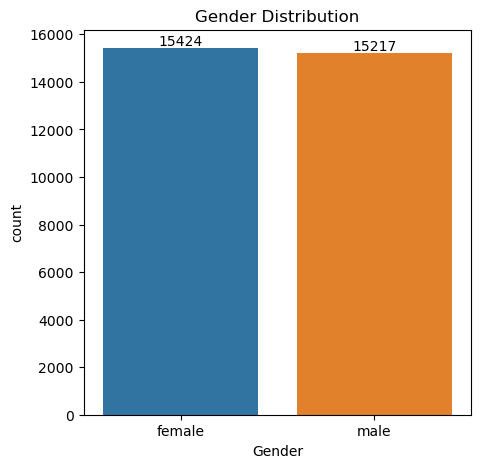

In [66]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=df,x="Gender")
plt.title("Gender Distribution")
ax.bar_label(ax.containers[0])
plt.show()

In [21]:
# from the above chart we have snalysed the number of females in the data is 
# more than the number of males 

In [22]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


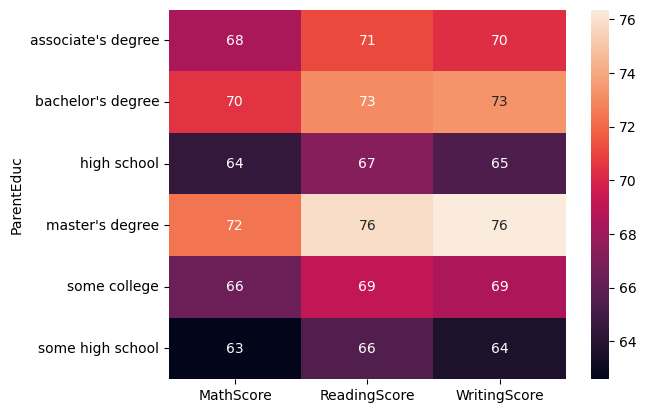

In [25]:
sns.heatmap(gb,annot=True)
plt.show()

In [26]:
# from the above chart we conclude that the education of parents have a good
# impact on the score

In [28]:
gb1=df.groupby("ParentMaritalStatus").agg({"MathScore":'mean',"ReadingScore":"mean","WritingScore":"mean"})
print(gb1)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.691197     69.655011     68.799146
married              66.657326     69.389575     68.420981
single               66.165704     69.157250     68.174440
widowed              67.368866     69.651438     68.563452


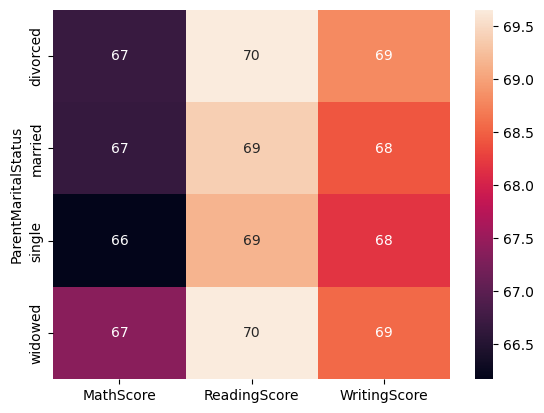

In [29]:
sns.heatmap(gb1,annot=True)
plt.show()

In [30]:
#from the above chart marital status has no or negligible impact on the student score

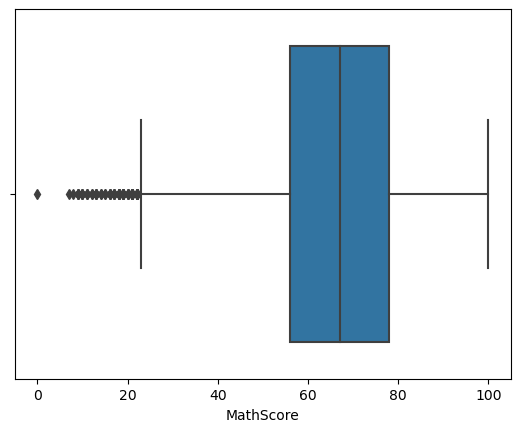

In [33]:
sns.boxplot(data=df,x="MathScore")
plt.show()

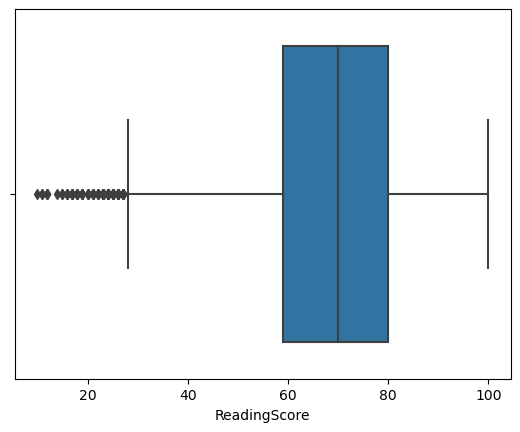

In [34]:
sns.boxplot(data=df,x="ReadingScore")
plt.show()

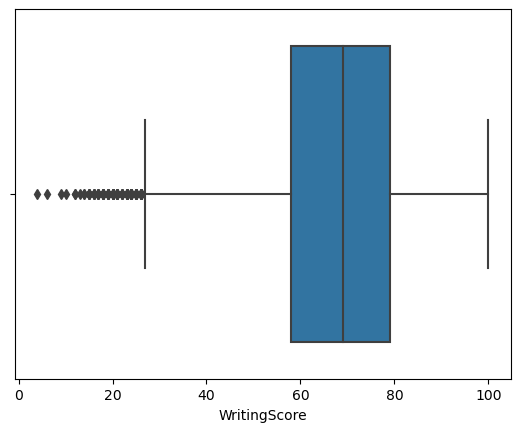

In [35]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

In [36]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


#### distribution of ethnic groups

In [41]:
groupA=df.loc[(df['EthnicGroup']=="group A")].count()
print(groupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


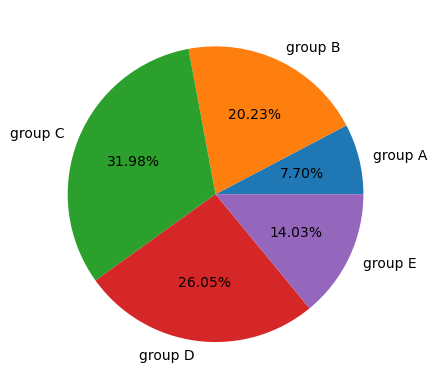

In [47]:
groupB=df.loc[(df['EthnicGroup']=="group B")].count()
groupC=df.loc[(df['EthnicGroup']=="group C")].count()
groupD=df.loc[(df['EthnicGroup']=="group D")].count()
groupE=df.loc[(df['EthnicGroup']=="group E")].count()

l=["group A","group B","group C","group D","group E"]
mlist=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist, labels=l,autopct='%1.2f%%')
plt.show()

In [48]:
import pandas as pd
import numpy as np

# Sample DataFrame with missing values
data = {
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, np.nan, 8],
    'C': [np.nan, 10, 11, 12]
}
df = pd.DataFrame(data)

# Identify missing values
print("Missing Values:")
print(df.isnull())

# Count missing values in each column
print("\nCount of Missing Values in Each Column:")
print(df.isnull().sum())

# Drop rows with any missing values
df_dropped = df.dropna()
print("\nDataFrame after dropping rows with any missing values:")
print(df_dropped)

# Fill missing values with mean of each column
df_filled = df.fillna(df.mean())
print("\nDataFrame after filling missing values with mean:")
print(df_filled)


Missing Values:
       A      B      C
0  False  False   True
1  False   True  False
2   True   True  False
3  False  False  False

Count of Missing Values in Each Column:
A    1
B    2
C    1
dtype: int64

DataFrame after dropping rows with any missing values:
     A    B     C
3  4.0  8.0  12.0

DataFrame after filling missing values with mean:
          A    B     C
0  1.000000  5.0  11.0
1  2.000000  6.5  10.0
2  2.333333  6.5  11.0
3  4.000000  8.0  12.0


In [49]:
data = {
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, np.nan, 8],
    'C': [np.nan, 10, 11, 12]
}

In [50]:
data

{'A': [1, 2, nan, 4], 'B': [5, nan, nan, 8], 'C': [nan, 10, 11, 12]}

In [51]:
df = pd.DataFrame(data)

In [52]:
df

,A,B,C
0,1.0,5.0,NaN
1,2.0,NaN,10.0
2,NaN,NaN,11.0
3,4.0,8.0,12.0


In [53]:
df_dropped

,A,B,C
3,4.0,8.0,12.0
